# WMT of tendency terms
## CM2.6
## Table Of Contents: <a class="anchor" id="top"> </a>
* [Make histogram of each term](#first-bullet)
* [Save histograms](#second-bullet)

In [1]:
from dask_gateway import Gateway
g = Gateway()
cluster = g.connect(g.list_clusters()[0].name)
client = cluster.get_client()

In [2]:
client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: /services/dask-gateway/clusters/prod.9019a55d428c4302a2d4c28e71a75e35/status,


In [41]:
cluster.close()
client.close()

In [3]:
import xarray as xr
import numpy as np
import dask.array as dsa
import matplotlib.pyplot as plt
from fastjmd95 import jmd95numba
import gcsfs
import gcm_filters
import xgcm
from typing import Annotated

In [4]:
import json
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [5]:
tracers = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CM2_6/datasets/tracer_tendencies.zarr'))
drhodts = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CM2_6/datasets/drhodts_tendencies.zarr'))
rho_cab = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CM2_6/datasets/rho_lap_cab_tendencies.zarr'))

tendencies = xr.merge([tracers, drhodts, rho_cab])

In [6]:
def open_surf_tends(basin_file):
    ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CM2_6/datasets/surf/' + basin_file + '_tends.zarr'))
    return ds

def open_histograms(basin_file):
    ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CM2_6/datasets/basin-histograms/' + basin_file + '.zarr'))
    return ds

In [7]:
surf_names = list(['natl_ocean_surf', 'satl_ocean_surf', 'npac_ocean_surf', 
                   'spac_ocean_surf', 'arc_ocean_surf', 'south_ocean_surf', 'ind_ocean_surf'])
surf_hist_names = list(['natl_hist_surf', 'satl_hist_surf', 'npac_hist_surf', 
                   'spac_hist_surf', 'arc_hist_surf', 'south_hist_surf', 'ind_hist_surf'])
hist_names = list(['natl_hist', 'satl_hist', 'npac_hist', 
             'spac_hist', 'arc_hist', 'south_hist', 'ind_hist'])
surf_tends = list()
surf_hist = list()
hist = list()

In [8]:
#load in basin surface tendencies
for name in surf_names:
    surf_tends.append(open_surf_tends(name))
    for ds in surf_tends:
        globals()[name] = ds

In [9]:
#load in basin surface histograms
for name in surf_hist_names:
    surf_hist.append(open_histograms(name))
    for ds in surf_hist:
        globals()[name] = ds

In [10]:
#load in basin mixing histograms
for name in hist_names:
    hist.append(open_histograms(name))
    for ds in hist:
        globals()[name] = ds

# Plot ann mean

In [11]:
def ann_mean(mix, surf):
    fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,5))
    line_colors=['blue', 'k', 
                 'orange', 'green']
    line_surf = ['purple', 'yellow']
    for (i,j) in zip(list(mix.data_vars), line_colors):
        (mix[i].mean('time')/1e6).plot(label=f'{i}', color=j, ax=ax0)
    for (i,j) in zip(list(surf.data_vars), line_surf):
        (surf[i].mean('time')/1e6).plot(label=f'{i}', color=j, ax=ax1)
    ax0.legend()
    ax0.set_xlim(1016,1030)
    ax0.set_ylabel(r'Transformation (Sv)', fontsize=16)
    ax0.grid()
    ax0.set_title('Mixing terms')
    ax0.set_xlabel('')
    
    ax1.legend()
    ax1.set_xlim(1016,1030)
    ax1.set_ylabel('')
    ax1.grid()
    ax1.set_title('Surface terms')
    ax1.set_xlabel('')
    
    fig.supxlabel('Rho bins', fontsize=16)
    plt.suptitle('Annual Mean Transformation', fontsize=20);

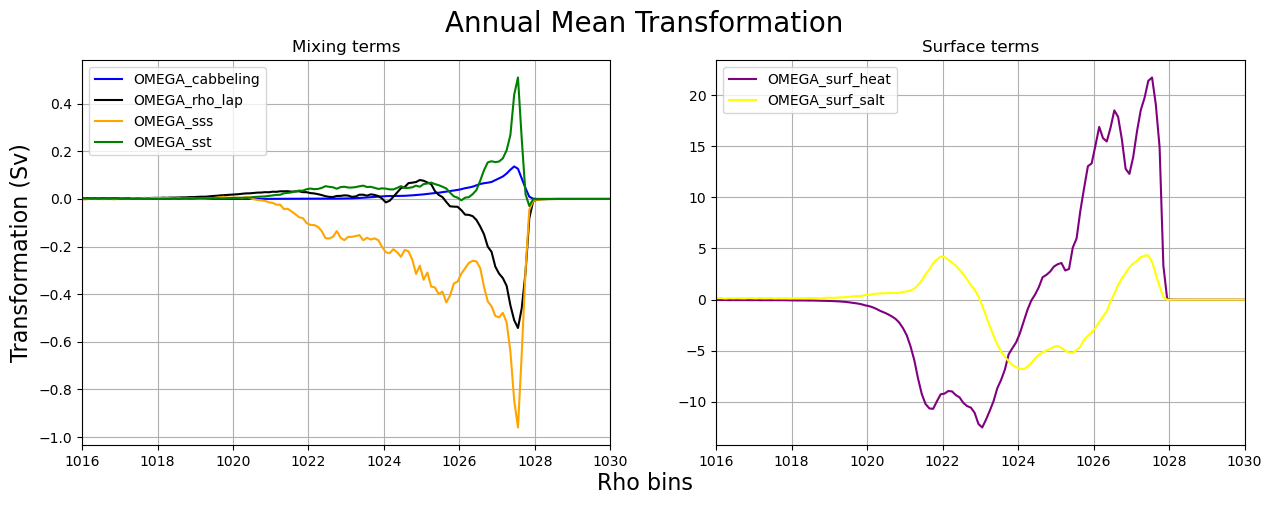

In [12]:
ann_mean(natl_hist, natl_hist_surf)

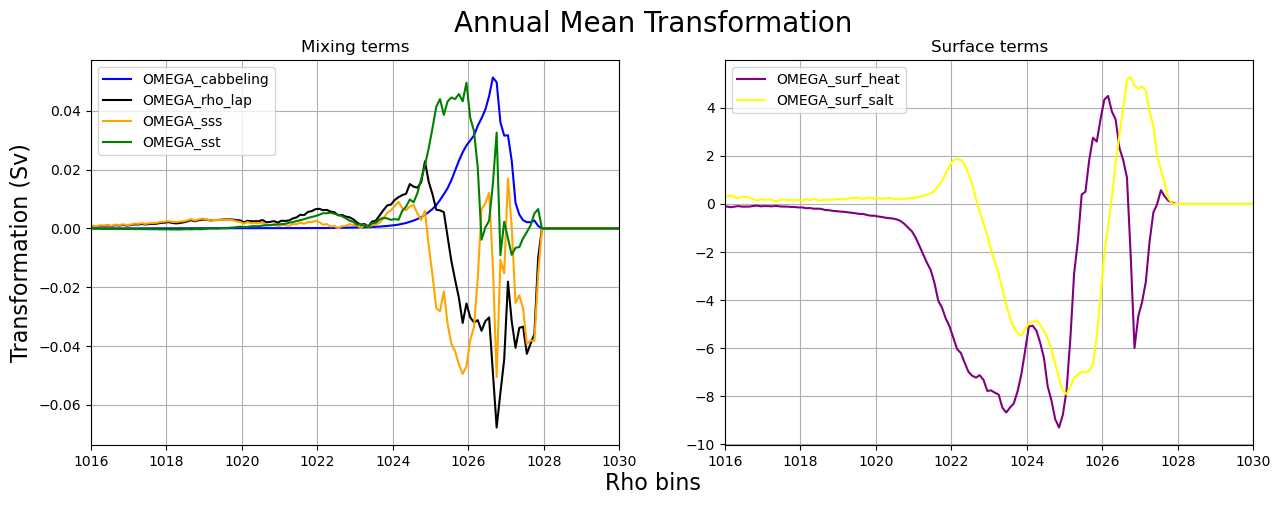

In [13]:
ann_mean(satl_hist, satl_hist_surf)

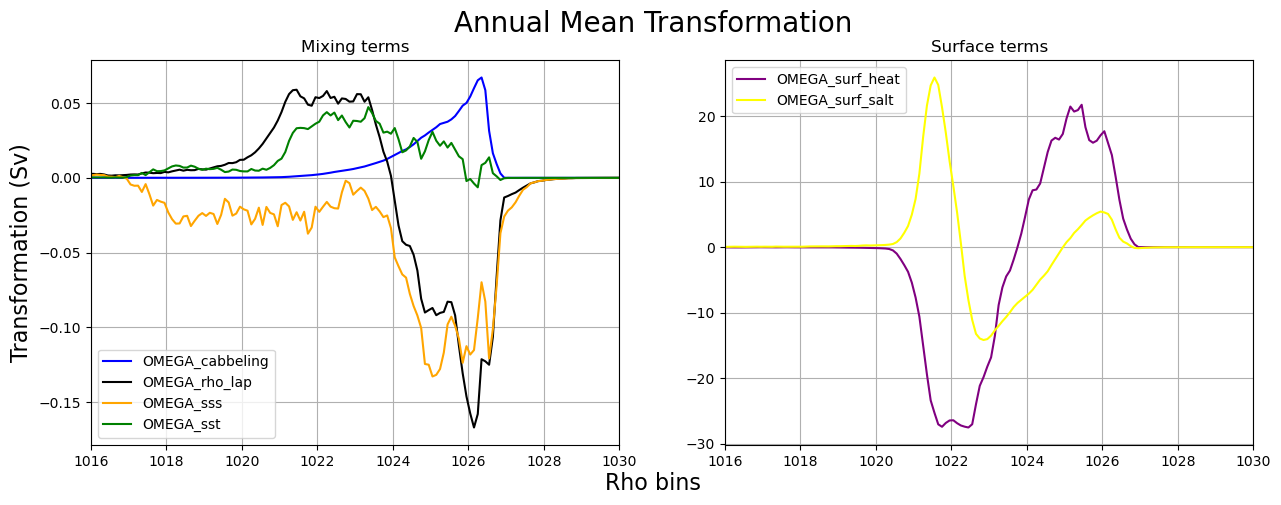

In [14]:
ann_mean(npac_hist, npac_hist_surf)

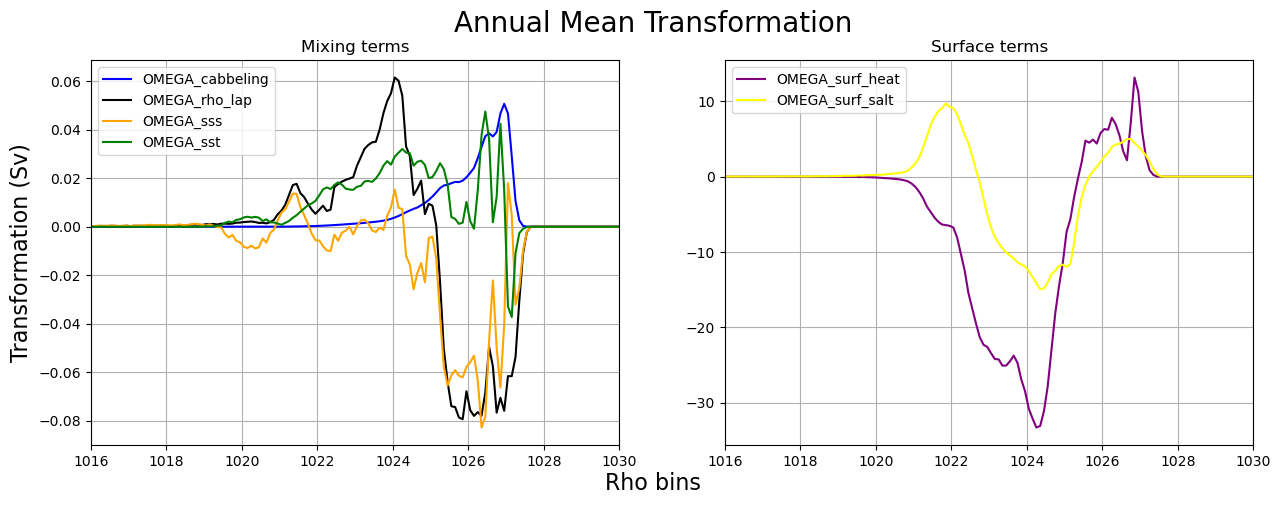

In [15]:
ann_mean(spac_hist, spac_hist_surf)

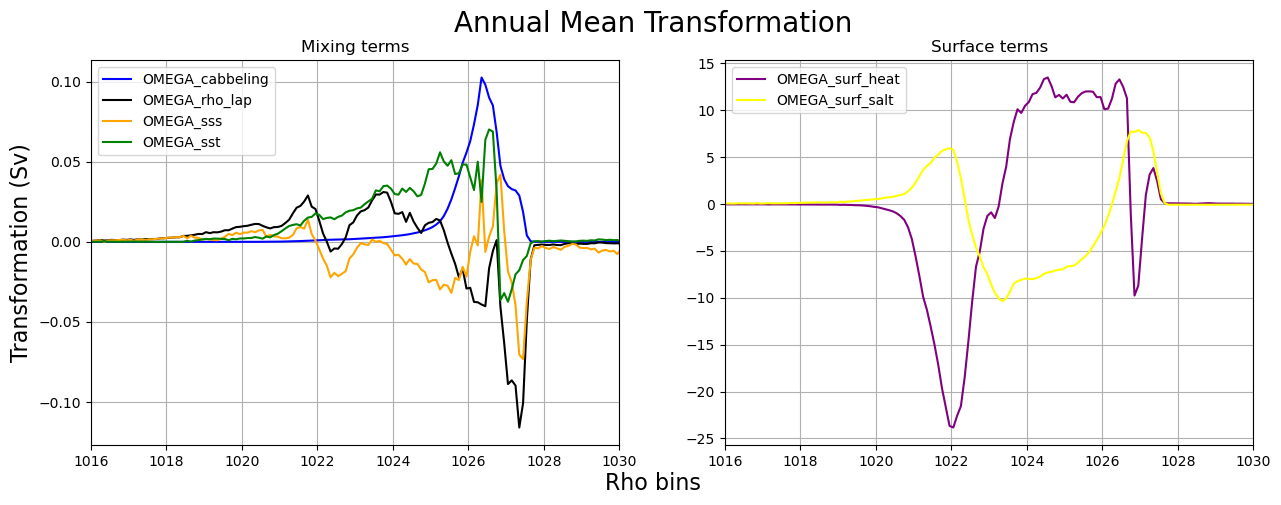

In [16]:
ann_mean(ind_hist, ind_hist_surf)

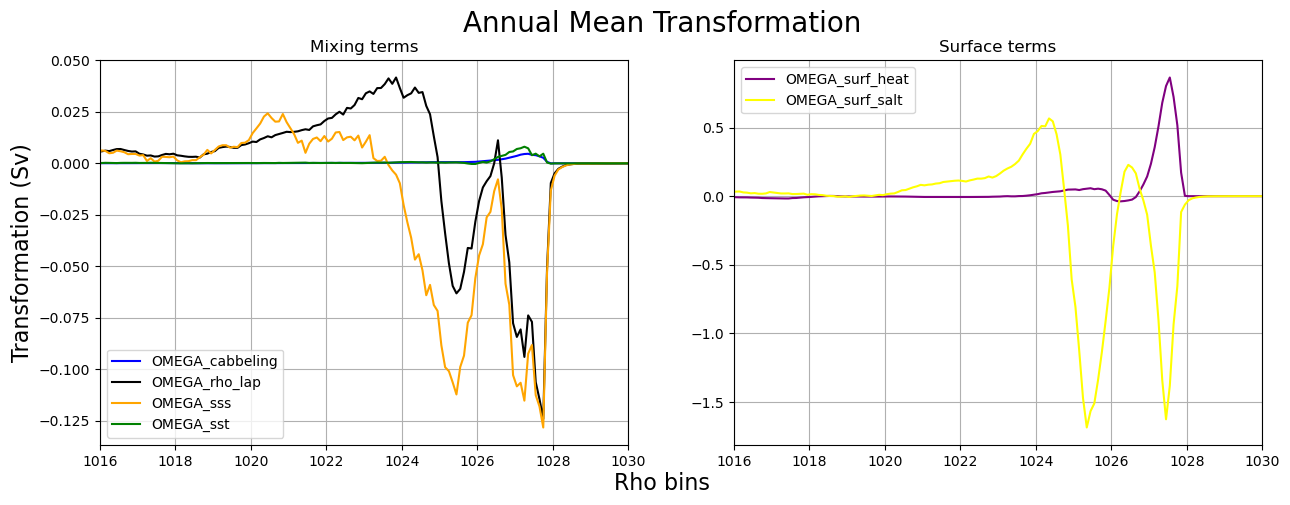

In [17]:
ann_mean(arc_hist, arc_hist_surf)

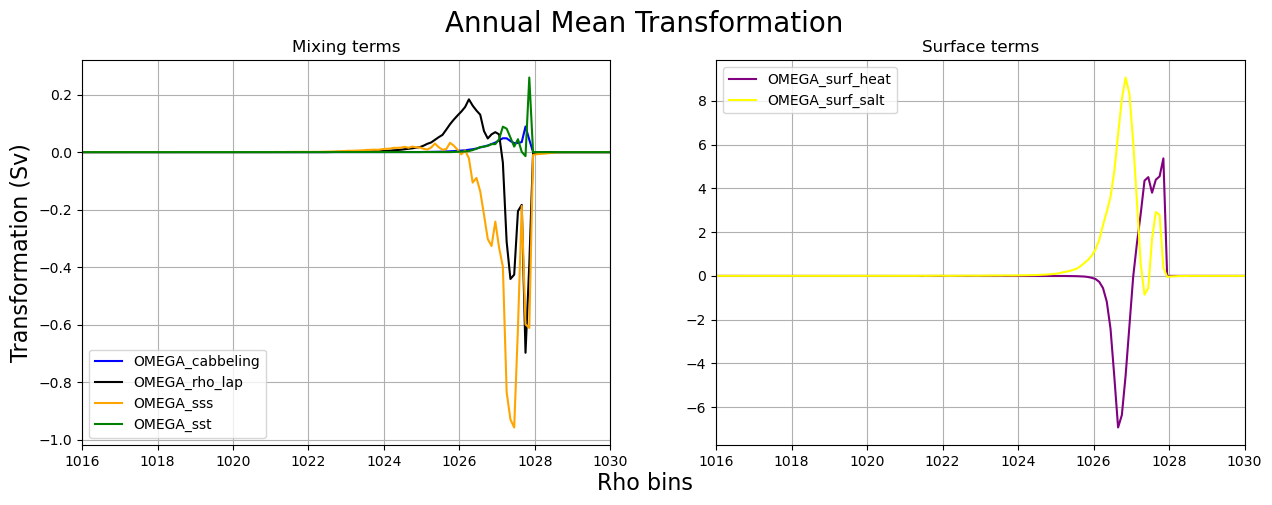

2023-05-04 21:10:55,357 - tornado.application - ERROR - Exception in callback <bound method Client._heartbeat of <Client: 'tls://10.0.148.50:8786' processes=30 threads=60, memory=900.00 GiB>>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/tornado/ioloop.py", line 921, in _run
    val = self.callback()
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/distributed/client.py", line 1445, in _heartbeat
    self.scheduler_comm.send({"op": "heartbeat-client"})
AttributeError: 'NoneType' object has no attribute 'send'
ERROR:tornado.application:Exception in callback <bound method Client._heartbeat of <Client: 'tls://10.0.148.50:8786' processes=30 threads=60, memory=900.00 GiB>>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/tornado/ioloop.py", line 921, in _run
    val = self.callback()
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/distributed/client.py", line 1445, i

In [18]:
ann_mean(south_hist, south_hist_surf)

[Back to top](#top)